## Import Necessary Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = np.load("/content/drive/My Drive/DL/X.npy")
Y = np.load("/content/drive/My Drive/DL/Y.npy")
# y = pd.read_csv("/content/drive/My Drive/DL/Y.npy", sep = " ", header = None)

### Load the Dataset

In [ ]:
print(X.shape)
print(Y.shape)

(2062, 64, 64)
(2062, 10)


Let's take a look at some of the examples

1855 - 2061: 5 = 206

1649 - 1854: 2

1443 - 1648: 3 

1236 - 1442: 4

1028 - 1235: 8

822 - 1027: 1

615 - 821: 6

409 - 614: 7

204 - 408: 0

0 - 203: 9

(-0.5, 63.5, 63.5, -0.5)

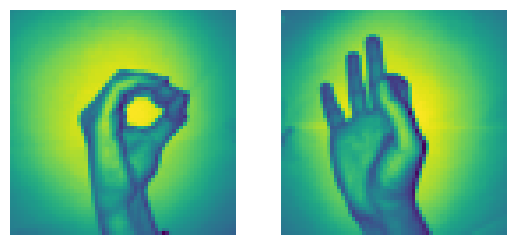

In [ ]:
plt.subplot(1,2,1)
plt.imshow(X[205])
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(X[0])
plt.axis("off")

The first image to the left is zero while the one to the right is 9

In [ ]:
print(Y[205])
print(Y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


You can see that it is not correctly labelled. Although if you examine the labels,  each image is incorrectly labelled in such a way that it is consistent.


For example:
Let's take a look at pictures that show the sign language for number 0 and 9 and look at their respective labels

#### The Number 0

(-0.5, 63.5, 63.5, -0.5)

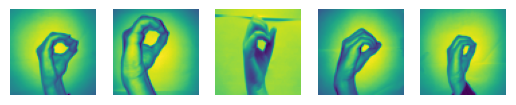

In [ ]:
plt.subplot(1,5,1)
plt.imshow(X[205])
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(X[204])
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(X[206])
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(X[210])
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(X[300])
plt.axis("off")

In [ ]:
print(Y[205])
print(Y[204])
print(Y[206])
print(Y[210])
print(Y[300])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


#### The Number 9

(-0.5, 63.5, 63.5, -0.5)

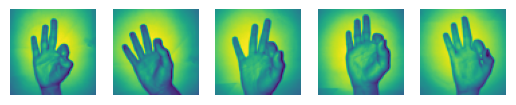

In [ ]:
plt.subplot(1,5,1)
plt.imshow(X[200])
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(X[190])
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(X[100])
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(X[90])
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(X[50])
plt.axis("off")

In [ ]:
print(Y[200])
print(Y[190])
print(Y[100])
print(Y[90])
print(Y[50])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


As you can see, although they are mislabelled, they have a constant and uniform mislabel.

You can use the dataset as it is or you can run the oode below to correct the labelling

In [ ]:
t = np.ones(207) * 5
q = np.ones(206) * 2
r = np.ones(206) * 3
s = np.ones(207) * 4
w = np.ones(205) * 8
p = np.ones(206)
u = np.ones(207) * 6 
v = np.ones(206) * 7
o = np.zeros(207)
z = np.ones(205) * 9
Y = np.concatenate((z,o,v,u,p,w,s,r,q,t), axis = 0).reshape(X.shape[0], 1)
Y.shape

(2062, 1)

In [ ]:
Y.shape

(2062, 10)

Y has 10 columns which represents each category 0 - 9. 

We need to convert the one hot encoded data into single digits

Before:

In [ ]:
Y[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

After

In [ ]:
Y = np.array([np.argmax(i) for i in Y]) #Store the index of the highest number for each example
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Standardize the Dataset

In [ ]:
X[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

Because my dataset is already normalized, I will not be standardizing it

### Test/Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

### Flatten the data

The image is a 64 by 64 pixel image. For the neurons to process it, the image needs to be flattened. 


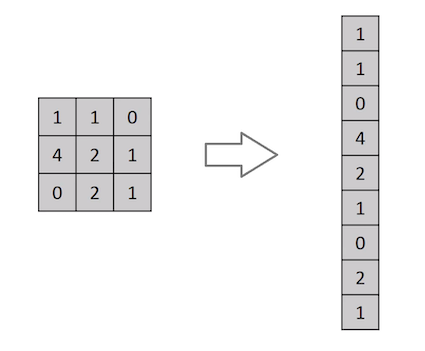

In [ ]:
X_train = X_train.reshape(len(X_train), 64 * 64)
X_test = X_test.reshape(len(X_test), 64 * 64)

The picture on the left above represents a black and white image. It is a 3 by 3  pixel image. The flattened image is on the right. This is now a vector that the neural network can easily process. It has the dimensions 3 * 3 = 9

Now, because our image is a 64 by 64 pixel image. Our flattened image will be a vector with the dimensions 64 * 64 = 4096

### Build the Model

I will be using a very simple model: A single neural Network

In [ ]:
model = keras.Sequential([
    layers.Dense(10, input_shape=(4096,), activation = "sigmoid")
])
model.compile(
optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### Training the Model

In [ ]:
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
46/46 [==============================] - 1s 4ms/step - loss: 2.7241 - accuracy: 0.1511
Epoch 2/10
46/46 [==============================] - 0s 4ms/step - loss: 2.0849 - accuracy: 0.2862
Epoch 3/10
46/46 [==============================] - 0s 4ms/step - loss: 2.0082 - accuracy: 0.3091
Epoch 4/10
46/46 [==============================] - 0s 4ms/step - loss: 1.7347 - accuracy: 0.4498
Epoch 5/10
46/46 [==============================] - 0s 3ms/step - loss: 1.5745 - accuracy: 0.4726
Epoch 6/10
46/46 [==============================] - 0s 6ms/step - loss: 1.5307 - accuracy: 0.5121
Epoch 7/10
46/46 [==============================] - 0s 4ms/step - loss: 1.3766 - accuracy: 0.5745
Epoch 8/10
46/46 [==============================] - 0s 5ms/step - loss: 1.4009 - accuracy: 0.5648
Epoch 9/10
46/46 [==============================] - 0s 4ms/step - loss: 1.3123 - accuracy: 0.5710
Epoch 10/10
46/46 [==============================] - 0s 3ms/step - loss: 1.2418 - accuracy: 0.6112


### Testing the Model

In [ ]:
y_predicted = model.predict(X_test)
y_predicted[0]

20/20 [==============================] - 0s 2ms/step


array([0.9822181 , 0.6462269 , 0.9674994 , 0.99835813, 0.8077758 ,
       0.9811329 , 0.9974236 , 0.8761629 , 0.81309104, 0.78758264],
      dtype=float32)

### Model Evaluation

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels = np.array(y_predicted_labels)

<Axes: >

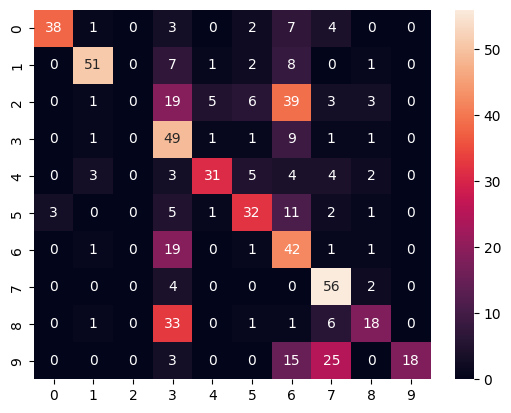

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predicted_labels), annot = True)

In [ ]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79        55
           1       0.86      0.73      0.79        70
           2       0.00      0.00      0.00        76
           3       0.34      0.78      0.47        63
           4       0.79      0.60      0.68        52
           5       0.64      0.58      0.61        55
           6       0.31      0.65      0.42        65
           7       0.55      0.90      0.68        62
           8       0.62      0.30      0.40        60
           9       1.00      0.30      0.46        61

    accuracy                           0.54       619
   macro avg       0.60      0.55      0.53       619
weighted avg       0.58      0.54      0.52       619



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model has 54% accuracy.

Now that we've been able to build a simple model. Let's build a model from scratch

Resources:
https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7&t=420s